### Model LDA dan LSA Pemilu

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('lda_filtered.csv')
data.head(5)

,processed_content
0,kumaha barudak well yuk ramaikan pesta anak no...
1,kapolri jenderal lisyto sigit prabowo bicara s...
2,ketua umum pdip megawati soekarnoputri kader m...
3,pasangan capres cawapres koalisi perubahan ani...
4,presiden joko widodo memimpin upacara peringat...


In [3]:
len(data)

30879

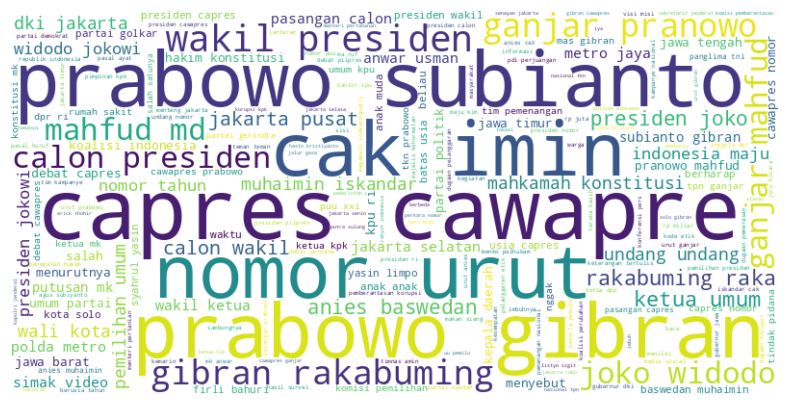

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all texts into one string
all_texts = ' '.join(data['processed_content'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_texts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## LDA

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Membuat objek CountVectorizer
vectorizer = CountVectorizer()

# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['processed_content'])

In [7]:
# Membuat model LDA dengan 10 topik
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

In [8]:
# Melatih model LDA
lda_model.fit(X)

# Mendapatkan kata-kata kunci untuk setiap topik
feature_names = vectorizer.get_feature_names_out()

top_n_words = 5  # Jumlah kata kunci untuk setiap topik
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topik {topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]])

Topik 1:
['tni', 'mk', 'hakim', 'putusan', 'konstitusi']
Topik 2:
['prabowo', 'gibran', 'kpk', 'ketua', 'firli']
Topik 3:
['hukum', '2023', 'tersangka', 'kpk', 'korupsi']
Topik 4:
['2023', 'jakarta', 'kota', 'warga', 'jalan']
Topik 5:
['jokowi', 'partai', 'presiden', 'gibran', 'prabowo']
Topik 6:
['pemilu', 'tahun', 'mk', '2024', '2023']
Topik 7:
['persen', 'survei', 'israel', 'gaza', 'palestina']
Topik 8:
['anies', 'imin', 'cak', 'muhaimin', 'amin']
Topik 9:
['ganjar', 'mahfud', 'debat', 'cawapres', 'kpu']
Topik 10:
['indonesia', 'negara', 'masyarakat', 'anak', 'program']


#### Visualasi

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.manifold import MDS


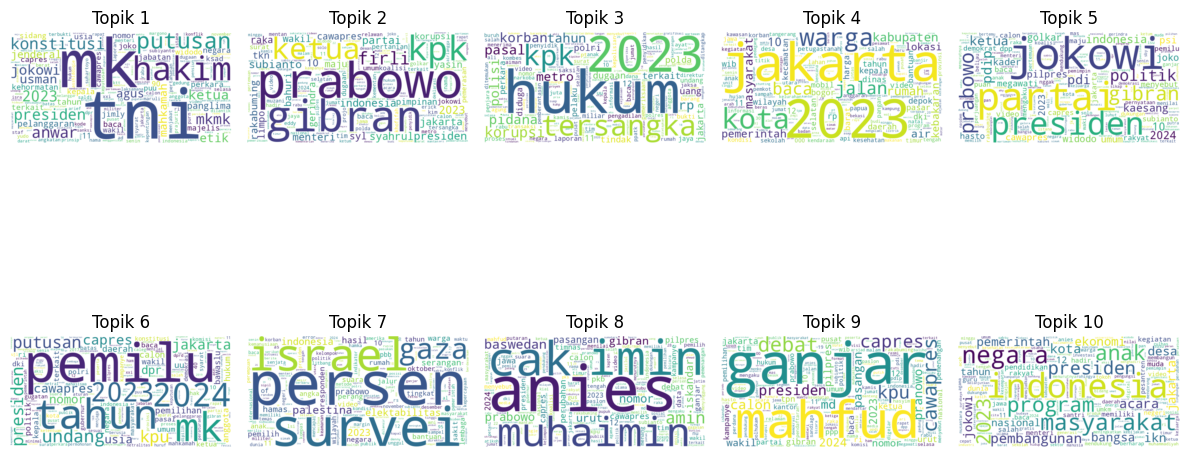

In [10]:
# Word Cloud
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, lda_model.components_[i])))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


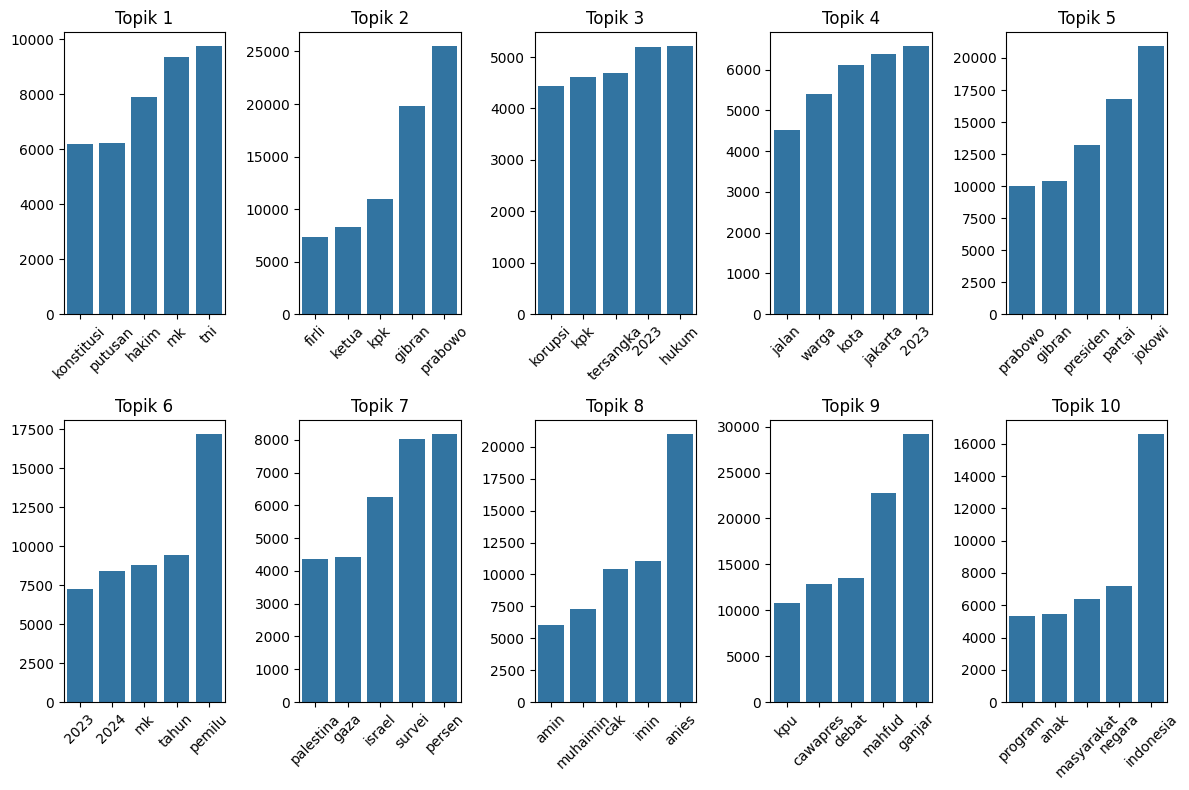

In [11]:
# Bar Plot
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    sns.barplot(x=[feature_names[j] for j in lda_model.components_[i].argsort()[-top_n_words:]], y=lda_model.components_[i][lda_model.components_[i].argsort()[-top_n_words:]])
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LSA 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Membuat vektor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_content'])

# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Menampilkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_terms = [terms[j] for j in topic.argsort()[-5:]]
    print(f"Topik {i+1}: {', '.join(top_terms)}")


Topik 1: presiden, cawapres, ganjar, prabowo, gibran
Topik 2: konstitusi, mkmk, hakim, putusan, mk
Topik 3: korupsi, syahrul, tersangka, firli, kpk
Topik 4: cak, imin, kpu, anies, debat
Topik 5: kpu, cawapres, prabowo, gibran, debat
Topik 6: persen, survei, cak, imin, anies
Topik 7: gibran, mahfud, persen, ganjar, survei
Topik 8: tni, debat, elektabilitas, persen, survei
Topik 9: pemilu, partai, kpu, agus, tni
Topik 10: widodo, survei, presiden, debat, jokowi


#### Visualasi

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

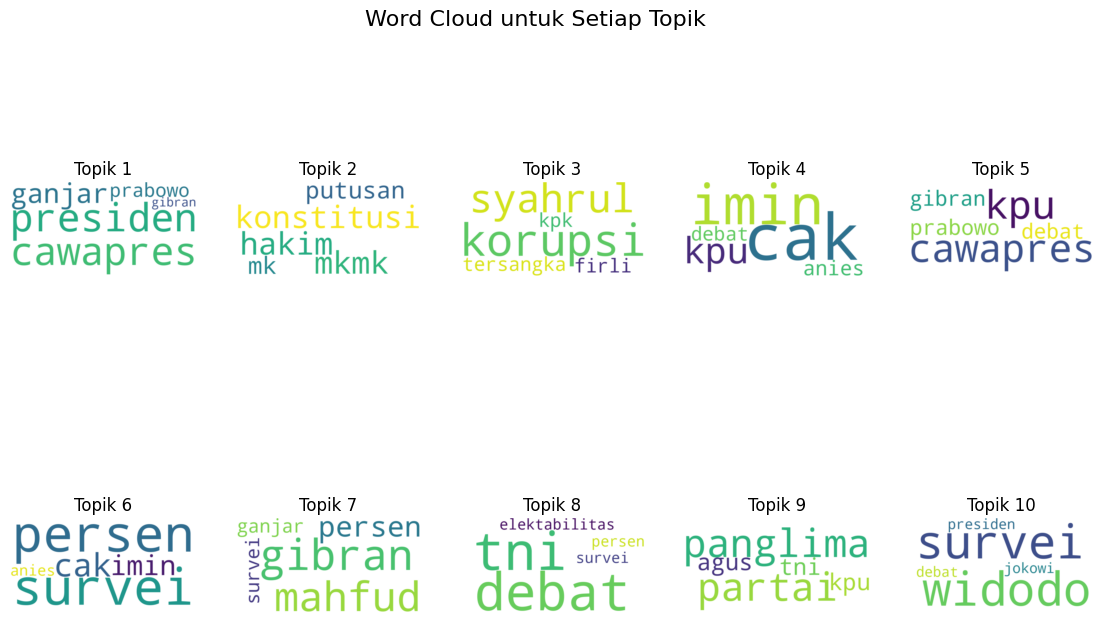

In [14]:
# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Mendapatkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
top_terms_per_topic = []
for topic in lsa_model.components_:
    top_terms = [terms[j] for j in topic.argsort()[-5:]]
    top_terms_per_topic.append(top_terms)

# Word Cloud
plt.figure(figsize=(14, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_terms_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.suptitle('Word Cloud untuk Setiap Topik', fontsize=16)
plt.show()

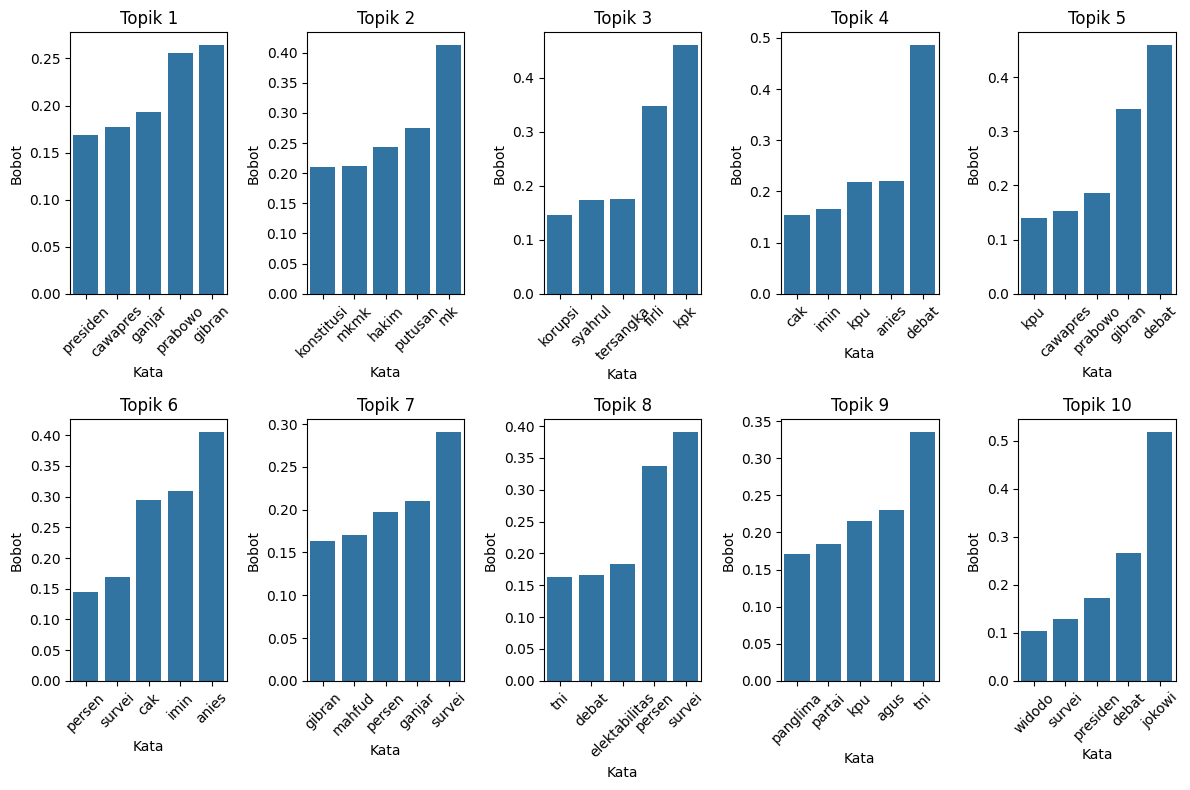

In [15]:
# Bar Plot Topik Kata untuk LSA
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    top_terms = [terms[j] for j in lsa_model.components_[i].argsort()[-5:]]
    top_weights = sorted(lsa_model.components_[i])[-5:]
    sns.barplot(x=top_terms, y=top_weights)
    plt.title(f'Topik {i+1}')
    plt.xlabel('Kata')
    plt.ylabel('Bobot')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
